# Kaggle: Michael Jordan, Kobe Bryant and Lebron James stats

## Introducción

Para este proyecto se utilizaran diferentes bases de datos que proporcionan información sobre todas las estadisticas de tres de los mejores jugadores de la historia del baloncesto: Michael Jordan, Kobe Bryant y Lebron James.

Los datasets utilizados para este proyecto serán:

    1. allgames_stats.csv: BD que proporciona las estadísticas de todos los partidos de los 3 jugadores
    2. per_game_stats.csv: BD que proporciona las estadísticas medias de cada temporada de los 3 jugadores
    3. 
    

## Objetivos

Los objetivos de este proyecto serán dos. Por una banda, realizar un analisis de los datos del dataset donde se encuentran las estadisticas de cada jugador por temporada y de este modo extraer conclusiones. Por otra banda, realizar la predicción de un atributo tomandolo como el "target" del problema, es decir, realizar un problema de regresión logística o linear.

De esta forma el objetivo principal de este proyecto será contestar las siguientes 2 preguntas:
    
    1. ¿Quién es estadisticamente el mejor jugador de los tres? -> Analisis de datos
    2. ¿Cuál será el resultado de un partido? -> Predicción de atributo categórico (Regresión logística)
    
#preguntar que atributo es mejor predecir si regresion logistica (victoria o derrota) o regresion linear (salarios o puntos en un partido por ejemplo)

## Exploratory Data Analysis

Antes de comenzar, realizaremos los imports de todas las librerias necesárias para realizar esta practica y cargaremos los datos de los datasets que utilizaremos 

In [23]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import scipy.stats
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from statistics import mean
from sklearn import svm 
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
import warnings 
warnings.filterwarnings('ignore')

def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# carreguem dataset 

dataset_per_game_stats = load_dataset('datasets/per_game_stats.csv')
data_per_game_stats = dataset_per_game_stats.values

dataset_allgames_stats = load_dataset('datasets/allgames_stats.csv')
data_allgames_stats = dataset_allgames_stats.values

# @ -> visitante

Realizaremos una primera visualización de los datos para conocer la dimensión y el número de atributos con los que operaremos

In [2]:
print("Dataset per_game_stats")
dataset_per_game_stats.head()

Dataset per_game_stats


,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player,RSorPO
0,2003-04,19,CLE,NBA,SG,79,79,39.5,7.9,18.9,...,4.2,5.5,5.9,1.6,0.7,3.5,1.9,20.9,Lebron James,Regular Season
1,2004-05,20,CLE,NBA,SF,80,80,42.4,9.9,21.1,...,6.0,7.4,7.2,2.2,0.7,3.3,1.8,27.2,Lebron James,Regular Season
2,2005-06,21,CLE,NBA,SF,79,79,42.5,11.1,23.1,...,6.1,7.0,6.6,1.6,0.8,3.3,2.3,31.4,Lebron James,Regular Season
3,2006-07,22,CLE,NBA,SF,78,78,40.9,9.9,20.8,...,5.7,6.7,6.0,1.6,0.7,3.2,2.2,27.3,Lebron James,Regular Season
4,2007-08,23,CLE,NBA,SF,75,74,40.4,10.6,21.9,...,6.1,7.9,7.2,1.8,1.1,3.4,2.2,30.0,Lebron James,Regular Season


In [3]:
print("Dataset allgames_stats")
dataset_allgames_stats.head()

Dataset allgames_stats


,G,Date,Tm,X,Opp,Result,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Player,RSorPO
0,1,1996-11-03,LAL,NaN,MIN,W,0,6:00,0.0,1.0,...,1,0,0.0,1.0,1,1,0.0,-1.1,Kobe Bryant,Regular Season
1,2,1996-11-05,LAL,@,NYK,W,0,3:00,0.0,1.0,...,0,0,0.0,0.0,1,0,1.0,-1.1,Kobe Bryant,Regular Season
2,3,1996-11-06,LAL,@,CHH,L,0,7:00,2.0,3.0,...,0,0,0.0,0.0,3,0,5.0,0.7,Kobe Bryant,Regular Season
3,4,1996-11-08,LAL,@,TOR,L,0,17:00,3.0,8.0,...,3,0,0.0,1.0,0,3,10.0,5.2,Kobe Bryant,Regular Season
4,5,1996-11-10,LAL,NaN,ATL,W,0,8:00,0.0,3.0,...,3,1,0.0,0.0,0,0,2.0,1.9,Kobe Bryant,Regular Season


In [4]:
print("Dataset per_game_stats")
print("Dimensión base de datos: ", dataset_per_game_stats.shape)
print("Número de atributos: ", dataset_per_game_stats.columns.size)
print(" ")
print("Dataset allgames_stats")
print("Dimensión base de datos: ", dataset_allgames_stats.shape)
print("Número de atributos: ", dataset_allgames_stats.columns.size)

Dataset per_game_stats
Dimensión base de datos:  (92, 32)
Número de atributos:  32
 
Dataset allgames_stats
Dimensión base de datos:  (4254, 29)
Número de atributos:  29


**Dataset per_game_stats.csv**
Este dataset contiene las estadisticas y datos medios por temporada de cada uno de los tres jugadores. Como podemos observar, está formado por un total de 92 muestras y 32 atributos diferentes.

**Dataset allgames_stats.csv**
Este dataset contiene las estadisticas y datos de todos los partidos jugados de los 3 jugadores. Por ese mismo motivo el dataset está formado por un total de 4254 muestras y 29 atributos diferentes. 

A continuación comprobaremos el tipo de datos que contienen nuestros dataset

In [9]:
print("Dataset per_game_stats")
dataset_per_game_stats.dtypes

Dataset per_game_stats


Season     object
Age         int64
Tm         object
Lg         object
Pos        object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
Player     object
RSorPO     object
dtype: object

Para este dataset podemos que la mayoria de atributos son de tipo númerico ya que se tratan de atributos estadisticos sobre la temporada como podrian ser los puntos, rebotes, asistencias, etc. Tambien existen una serie de atributos de tipo string como podrian ser el nombre, la temporada, etc.

Estos atributos no numéricos seran tratados más adelante en el apartado de "Preprocessing", de igual modo también será necessario eliminar atributos númericos no necessarios en dicho apartado para realizar el problema ya que una base de datos con muchos atributos podria afectar a la hora de realizar predicciones. 

El atributo **target** a predecir para esta base de datos serán los puntos medios por temporada, por lo tanto será tratado como un problema de regresión lineal.

In [24]:
print("Dataset allgames_stats")
dataset_allgames_stats.dtypes

Dataset allgames_stats


G           int64
Date       object
Tm         object
X          object
Opp        object
Result     object
GS          int64
MP         object
FG        float64
FGA       float64
FG%       float64
3P          int64
3PA         int64
3P%       float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB         int64
AST         int64
STL       float64
BLK       float64
TOV         int64
PF          int64
PTS       float64
GmSc      float64
Player     object
RSorPO     object
dtype: object

De forma similar al dataset anterior, la mayoria de atributos que contiene este también son de tipo numerico ya que son los que hacen referencia a las estadisticas por partido. También existen una série de atributos de tipo no numerico como el jugador, el equipo, el rival, etc.

Dicho atributos serán tratados en el apartado de "Preprocessing" al igual que la eliminación de los atributos numéricos que no nos sean necesarios.

El atributo **target** a predecir para esta base de datos será el resultado del partido (win or lose), por lo tanto, será tratado como un problema de regresión logística donde trataremos de predecir un atributo categórico.
Dicho atributo es string (W or L), por lo tanto será necesario realizar la siguiente transformación:
    
        - Clase 0: Lose (int 0)
        - Clase 1: Win  (int 1)


## Preprocessing and Data Analysis 

En este apartado trataremos los datos. Es decir, normalizaremos, eliminaremos los outliers innecesarios, etc. Y continuaremos con el final del analisis de los datos (matrices de correlación y distribución de los datos).


Primero miraremos si nuestros datasets tienen muchos datos sin información

In [33]:
print("Dataset per_game_stats")
dataset_per_game_stats.isnull().sum()

Dataset per_game_stats


Season    0
Age       0
Tm        0
Lg        0
Pos       0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
Player    0
RSorPO    0
dtype: int64

Como podemos observar para este dataset no existe ninguna celda con datos vacios

In [120]:
print("Dataset allgames_stats")
dataset_allgames_stats.isnull().sum()

Dataset allgames_stats


G            0
Date         0
Tm           0
X         2137
Opp          0
Result       0
GS           0
MP           0
FG           4
FGA          7
FG%         17
3P           0
3PA          0
3P%        504
FT           1
FTA          2
FT%        135
ORB          1
DRB          2
TRB          0
AST          0
STL         11
BLK          1
TOV          0
PF           0
PTS          9
GmSc       219
Player       0
RSorPO       0
dtype: int64

En canvio, para este dataset encontramos una serie de atributos que sí se encuentran vacios. Por lo tanto, es necesario una serie de transformaciones. 

El atributo "X" hace referencia a si el jugador ha jugado el partido como local (valor nulo) o visitante (valor @), por lo tanto pararemos los valores nulos a 1 y los valores @ a 0

In [121]:
for i in range(dataset_allgames_stats.shape[0]):
    if dataset_allgames_stats["X"][i] == "@":
        dataset_allgames_stats["X"][i] = 0
    else:
        dataset_allgames_stats["X"][i] = 1

Ahora procedemos a fijarnos en nuestro atributo "target" de este dataset el cual es "Results". Al ser de tipo object lo pasaremos a tipo int de la siguiente forma que se ha explicado anteriormente para poder operar con él.

In [122]:
for i in range(dataset_allgames_stats.shape[0]):
    if dataset_allgames_stats["Result"][i] == "L":
        dataset_allgames_stats["Result"][i] = 0
    elif dataset_allgames_stats["Result"][i] == "W":
        dataset_allgames_stats["Result"][i] = 1
        
dataset_allgames_stats["Result"] = pd.to_numeric(dataset_allgames_stats["Result"])

Para el resto de atributos, he decidido eliminar las muestras que contienen atributos nulos de menor cantidad. En canvio, para las muestras que contienen los atributos de mayor cantidad de valores nulos sustituiré esos valores nulos por la media.

In [123]:
dataset_allgames_stats["FG"].fillna(value=999, inplace=True)
dataset_allgames_stats["FGA"].fillna(value=999, inplace=True)
dataset_allgames_stats["FT"].fillna(value=999, inplace=True)
dataset_allgames_stats["FTA"].fillna(value=999, inplace=True)
dataset_allgames_stats["ORB"].fillna(value=999, inplace=True)
dataset_allgames_stats["DRB"].fillna(value=999, inplace=True)
dataset_allgames_stats["BLK"].fillna(value=999, inplace=True)
dataset_allgames_stats["PTS"].fillna(value=999, inplace=True)

filasElim = []
for i in range(dataset_allgames_stats.shape[0]):
    for x in dataset_allgames_stats.columns:
        if dataset_allgames_stats[x][i] == 999:
            filasElim.append(i)
dataset_allgames_stats = dataset_allgames_stats.drop(filasElim)

dataset_allgames_stats["FG%"].fillna(value=dataset_allgames_stats["FG%"].median(),inplace=True)
dataset_allgames_stats["3P%"].fillna(value=dataset_allgames_stats["3P%"].median(), inplace=True)
dataset_allgames_stats["FT%"].fillna(value=dataset_allgames_stats["FT%"].median(), inplace=True)
dataset_allgames_stats["STL"].fillna(value=dataset_allgames_stats["STL"].median(), inplace=True)
dataset_allgames_stats["GmSc"].fillna(value=dataset_allgames_stats["GmSc"].median(), inplace=True)

Para los dos datasets hay una serie de atributos que por diferentes motivos no nos serán utiles, ya sea porque contienen datos de poca utilidad o porque son strings que unicamente nos servirian para analizar o visualizar datos en forma de histogramas pero no para hacer las predicciones. 

Por lo tanto, eliminaremos aquellos atributos que no nos sean necesarios. 

A continuación, realizaremos las matrices de correlación para visualizar la correlación de los atributos

Matriz de correlación Dataset per_game_stats


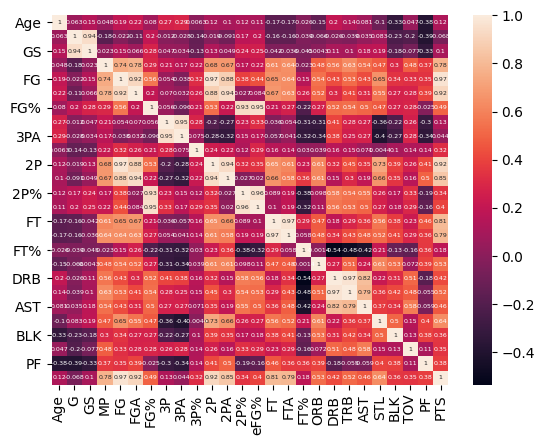

In [20]:
print("Matriz de correlación Dataset per_game_stats")
correlacio = dataset_per_game_stats.corr()
plt.figure()
ax = sns.heatmap(correlacio, annot=True, annot_kws={"size": 4.5})

Como se puede observar, los atributos para este dataset están bastante bien correlacionados entre si. Concretamente, nuestro atributo a predecir PTS (puntos medios por temporada) obtiene las correlacioenes más altas con los atributos FG (0.97), FGA (0.92), 2P (0.92), FTA (0.79), FT (0.51), 2PA (0.55) y STL (0.64) . 
Que hacen referéncia a:

    - FG: Media de canastas por partido
    - FGA: Media de intentos de canasta por partido
    - 2P: Media de canastas de 2 puntos por partido
    - 2PA: Media de intentos de canasta de 2 puntos por partido
    - FTA: Media de intentos de tiro libre por partido
    - FT: Media de canastas de tiro libre por partido
    - STL: Media de robos por partido

Matriz de correlación Dataset allgames_stats


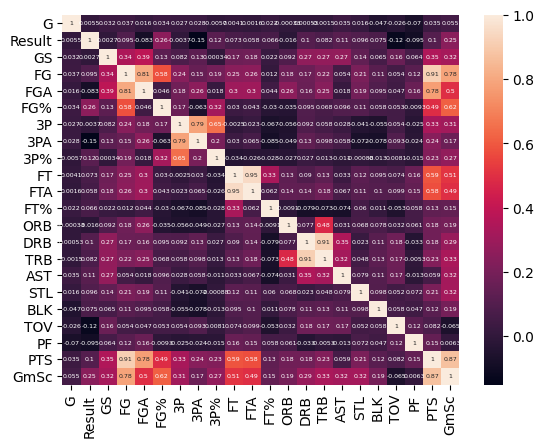

In [28]:
print("Matriz de correlación Dataset allgames_stats")
correlacio = dataset_allgames_stats.corr()
plt.figure()
ax = sns.heatmap(correlacio, annot=True, annot_kws={"size": 4.5})

In [2]:
dataset[dataset.Player == "Kobe Bryant"]

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player,RSorPO
57,1996-97,18,LAL,NBA,SG,71,6,15.5,2.5,5.9,...,1.2,1.9,1.3,0.7,0.3,1.6,1.4,7.6,Kobe Bryant,Regular Season
58,1997-98,19,LAL,NBA,SG,79,1,26.0,4.9,11.6,...,2.1,3.1,2.5,0.9,0.5,2.0,2.3,15.4,Kobe Bryant,Regular Season
59,1998-99,20,LAL,NBA,SG,50,50,37.9,7.2,15.6,...,4.2,5.3,3.8,1.4,1.0,3.1,3.1,19.9,Kobe Bryant,Regular Season
60,1999-00,21,LAL,NBA,SG,66,62,38.2,8.4,17.9,...,4.7,6.3,4.9,1.6,0.9,2.8,3.3,22.5,Kobe Bryant,Regular Season
61,2000-01,22,LAL,NBA,SG,68,68,40.9,10.3,22.2,...,4.3,5.9,5.0,1.7,0.6,3.2,3.3,28.5,Kobe Bryant,Regular Season
62,2001-02,23,LAL,NBA,SG,80,80,38.3,9.4,20.0,...,4.1,5.5,5.5,1.5,0.4,2.8,2.9,25.2,Kobe Bryant,Regular Season
63,2002-03,24,LAL,NBA,SG,82,82,41.5,10.6,23.5,...,5.6,6.9,5.9,2.2,0.8,3.5,2.7,30.0,Kobe Bryant,Regular Season
64,2003-04,25,LAL,NBA,SG,65,64,37.6,7.9,18.1,...,3.9,5.5,5.1,1.7,0.4,2.6,2.7,24.0,Kobe Bryant,Regular Season
65,2004-05,26,LAL,NBA,SG,66,66,40.7,8.7,20.1,...,4.5,5.9,6.0,1.3,0.8,4.1,2.6,27.6,Kobe Bryant,Regular Season
66,2005-06,27,LAL,NBA,SG,80,80,41.0,12.2,27.2,...,4.4,5.3,4.5,1.8,0.4,3.1,2.9,35.4,Kobe Bryant,Regular Season
